In [31]:
import numpy as np
import pickle
import glob
from scipy.stats import spearmanr
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

magic_thrh = 0.85

if_bg = False
category = 'car'
file_path = '/export/home/qliu24/qing_voting_data/intermediate/feat/'
# objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
filename = file_path + '{0}_mergelist_rand_train.pickle'.format(category)
if if_bg:
    filename = file_path + '{0}_mergelist_rand_train_bg.pickle'.format(category)
        
print(filename)
with open(filename, 'rb') as fh:
    _, r_set, _ = pickle.load(fh)

N = len(r_set)
layer_feature_b = [None for nn in range(N)]
stride=1
for nn in range(N):
    layer_feature_b[nn] = (r_set[nn]<magic_thrh).astype(int).T
    '''
    ihh, iww, idd = r_super_set[nn].shape
    
    tmp = np.zeros((math.ceil(ihh/stride), math.ceil(iww/stride), idd)).astype('int')
    for hh in range(0,ihh,stride):
        for ww in range(0,iww,stride):
            d_min = np.unravel_index(np.argmin(r_super_set[nn][hh:hh+stride,ww:ww+stride,:]), \
                                 r_super_set[nn][hh:hh+stride,ww:ww+stride,:].shape)
            if np.min(r_super_set[nn][hh:hh+stride,ww:ww+stride,:]) < magic_thrh:
                tmp[int(hh/stride),int(ww/stride),d_min[2]] = 1
            
    layer_feature_b[nn] = tmp.T
    '''

/export/home/qliu24/qing_voting_data/intermediate/feat/car_mergelist_rand_train.pickle


In [32]:
'''
N=len(layer_feature_dist_all)
magic_thh = 0.7

layer_feature_b = [None for nn in range(N)]
for nn in range(N):
    layer_feature_b[nn] = (layer_feature_dist_all[nn]<magic_thh).astype(int)
'''    

'\nN=len(layer_feature_dist_all)\nmagic_thh = 0.7\n\nlayer_feature_b = [None for nn in range(N)]\nfor nn in range(N):\n    layer_feature_b[nn] = (layer_feature_dist_all[nn]<magic_thh).astype(int)\n'

In [33]:
# VC num
max_0 = max([layer_feature_b[nn].shape[0] for nn in range(N)])

# width
max_1 = max([layer_feature_b[nn].shape[1] for nn in range(N)])

# height
max_2 = max([layer_feature_b[nn].shape[2] for nn in range(N)])
print(max_0, max_1, max_2)

190 54 16


In [34]:
all_bg_b = np.zeros((max_0, max_1, max_2))
for nn in range(N):
    vnum, ww, hh = layer_feature_b[nn].shape
    assert(vnum == max_0)
    diff_w1 = int((max_1-ww)/2)
    diff_w2 = int(max_1-ww-diff_w1)
    assert(max_1 == diff_w1+diff_w2+ww)
    
    diff_h1 = int((max_2-hh)/2)
    diff_h2 = int(max_2-hh-diff_h1)
    assert(max_2 == diff_h1+diff_h2+hh)
    
    # padded = np.pad(layer_feature_b[nn], ((0,0),(diff_w1, diff_w2),(diff_h1, diff_h2)), 'constant', constant_values=0)
    all_bg_b += np.pad(layer_feature_b[nn], ((0,0),(diff_w1, diff_w2),(diff_h1, diff_h2)), 'constant', constant_values=0)
    
probs = all_bg_b/N + 1e-3

In [35]:
np.argsort(np.max(np.max(probs, axis=1),axis=1))

array([ 15,  28,   0, 187,  41, 145,  91,  10,  22, 179, 172, 136, 185,
        95,  57, 152, 105, 157, 177,  70,  82,  32, 113,  90, 144, 170,
       169, 159,  20, 171,  68,  38,  14,  88, 184,  13, 138, 116,   4,
        76, 183,  56,   5,   8, 162,  72, 118, 182, 141, 128,  73, 165,
        39, 149,  35, 123, 104, 160, 129,  42, 139, 156,   1, 176,  74,
        31,  49,  78, 130,  93, 147,  65,  64, 181, 180,  79,  50, 103,
       173, 106,  87, 140,  37, 122, 124,  36,  59,  80,  84, 127,  48,
       151, 102,  46, 178,  96,  17,  94, 115,  34,   7, 163, 142,  18,
       148, 164, 153, 143,  86, 132, 161, 107,  24, 174, 112, 117, 131,
       188, 158,  98, 119, 166,  21,  58, 168,  66, 137,  25, 126,  99,
        67,  54,  16,  44,  63,  83,  53,  26, 167,  30, 108, 120, 111,
        71,  40, 121,  33,  11, 186,  61,  27, 125,  77, 134, 175, 146,
        29, 150,  43,  47,  69,  45, 154, 133,  75, 155,  62,  60, 114,
        23,  51,   9,  81,  12,   6, 109, 135,  85,  19,   3,  9

0.184
0.00645023148148
0.001


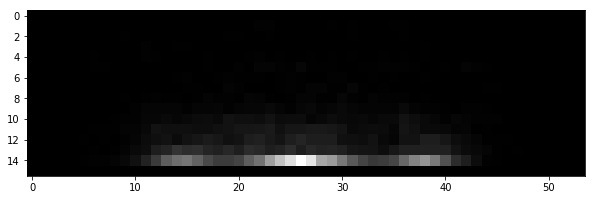

In [43]:
# mean_acr_vc = np.mean(probs, axis=0)
# print(np.max(mean_acr_vc))
# print(np.mean(mean_acr_vc))
# print(np.min(mean_acr_vc))
vcid=189
print(np.max(probs[vcid]))
print(np.mean(probs[vcid]))
print(np.min(probs[vcid]))

fig, ax = plt.subplots()
# ax.imshow(mean_acr_vc.T)
ax.imshow(probs[vcid].T)
plt.show()

In [44]:
weights = np.log(probs/(1.-probs))
print(weights.shape)
save_path = '/mnt/4T-HD/qing/intermediate/unary_weights/'
savefile = save_path+'{0}_train.pickle'.format(category)
if if_bg:
    savefile = save_path+'{0}_train_bg.pickle'.format(category)
    
with open(savefile, 'wb') as fh:
    pickle.dump(weights, fh)

'''
import scipy.io as sio
sio.savemat('/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/all_train_bg2.mat', mdict={'weight': weights})
'''

(80, 25, 14)


"\nimport scipy.io as sio\nsio.savemat('/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/all_train_bg2.mat', mdict={'weight': weights})\n"

In [24]:
!pwd

/home/candy/qing_voting_139/qing_clustering
